In [30]:
import sys
sys.path.append('../')

import matplotlib.pyplot as plt
import seaborn as sns
import segment_tiles as st
import importlib
import cv2

import src.load_data as ld
import src.format_axis as fmt

## Show all 15 images of training set

removing subjects: ['12']
Found nans, removing row if NaN in columns: ['study_number_id_eye', 'clinical', 'subject']
Removed NaNs: 0


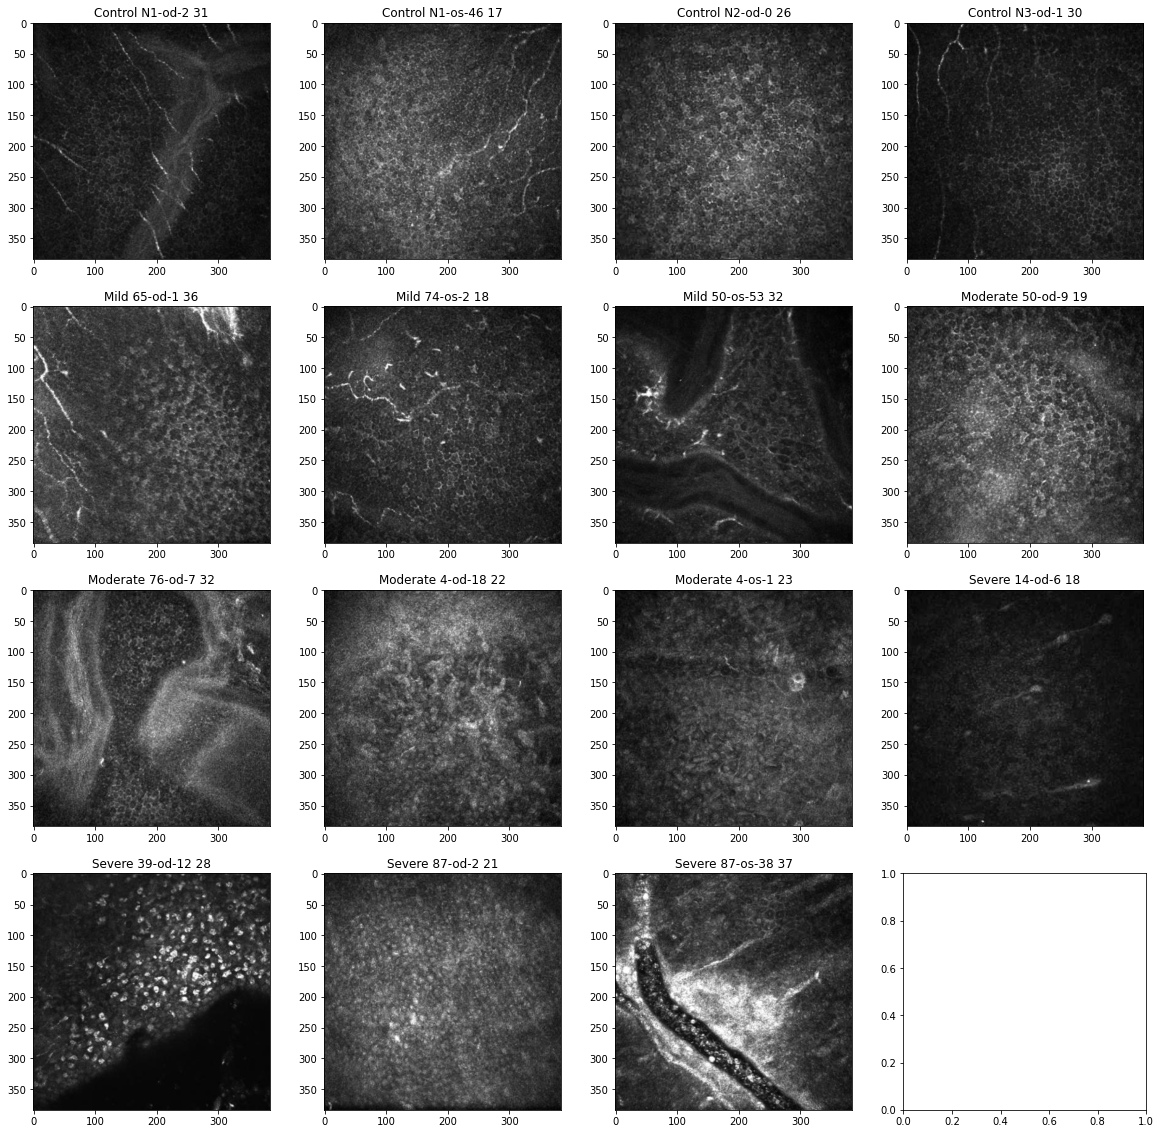

In [82]:
importlib.reload(ld)
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20,20))
im_shapes=[]

cc_scan = 'cc scan 2'
config_path = '../config/config.json'
metadata = ld.load_bcd_metadata(config_path)
for i in range(metadata.shape[0]):
    example_sub = metadata.iloc[i]
    example_scan = example_sub[cc_scan]
    patient_sample = example_sub['study_number_id_eye']
    img_class = example_sub['clinical']
    pid, img_slice = ld.convert_id_to_folder_label(
        patient_sample,
        example_scan
    )
    ax = axes.flatten()[i]
    img = ld.get_bcd_image(img_class, pid, img_slice, config_path=config_path)
    ax.imshow(img, cmap='gray')
    ax.set_title(img_class + ' ' + pid + ' ' + img_slice)

## Get tiles from training images
This section is used to tune parameters

Calculating grey level features:  10%|▉         | 49/500 [00:00<00:00, 487.30it/s]

N1-od-2 Control


Quick Convolution: 100%|██████████| 500/500 [00:00<00:00, 26190.50it/s]


Plotting output


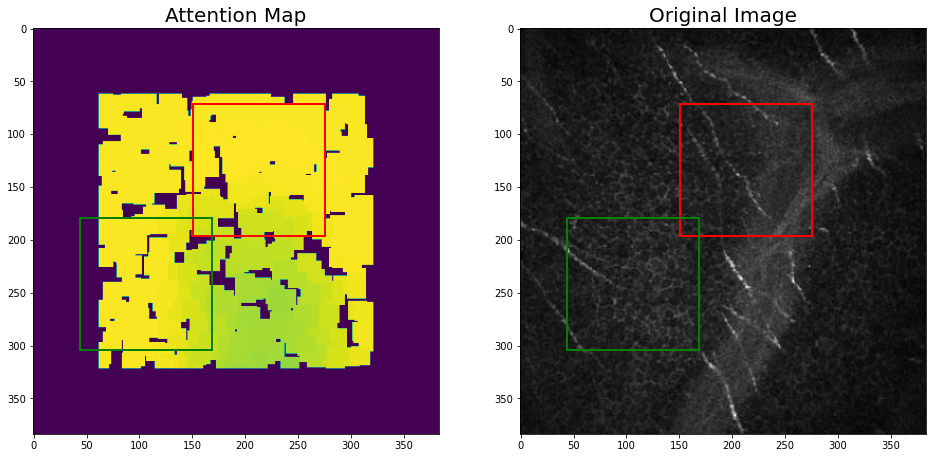

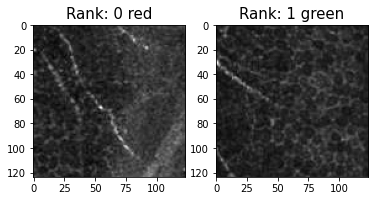

Calculating grey level features:  16%|█▌        | 79/500 [00:00<00:00, 782.68it/s]

N1-os-46 Control


Quick Convolution: 100%|██████████| 500/500 [00:00<00:00, 28798.33it/s]


Plotting output


<Figure size 432x288 with 0 Axes>

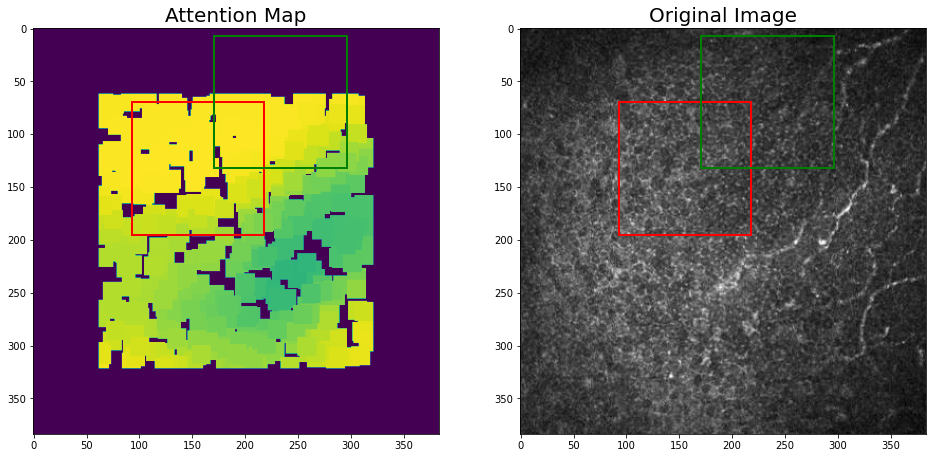

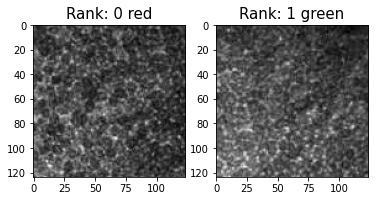

Calculating grey level features:  32%|███▏      | 159/500 [00:00<00:00, 770.01it/s]

N2-od-0 Control


Quick Convolution: 100%|██████████| 500/500 [00:00<00:00, 27406.59it/s]


Plotting output


<Figure size 432x288 with 0 Axes>

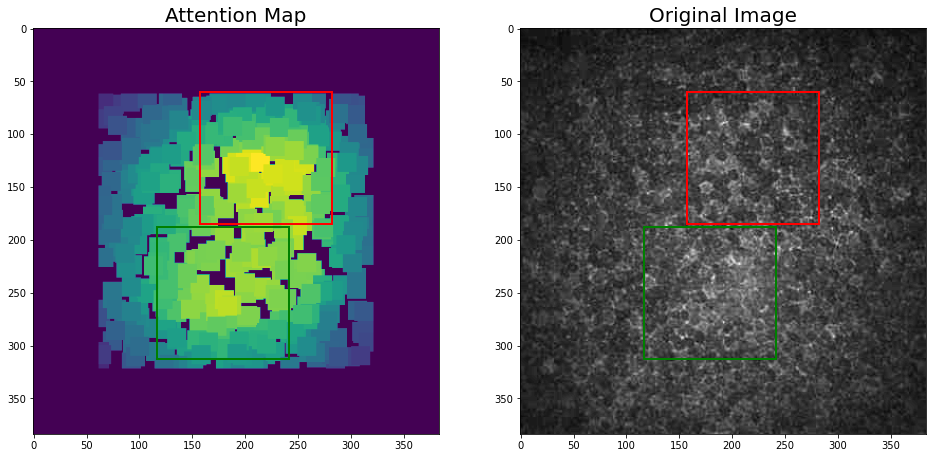

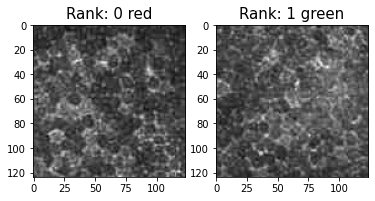

Calculating grey level features:  34%|███▍      | 169/500 [00:00<00:00, 855.75it/s]

N3-od-1 Control


Quick Convolution: 100%|██████████| 500/500 [00:00<00:00, 34503.98it/s]


Plotting output


<Figure size 432x288 with 0 Axes>

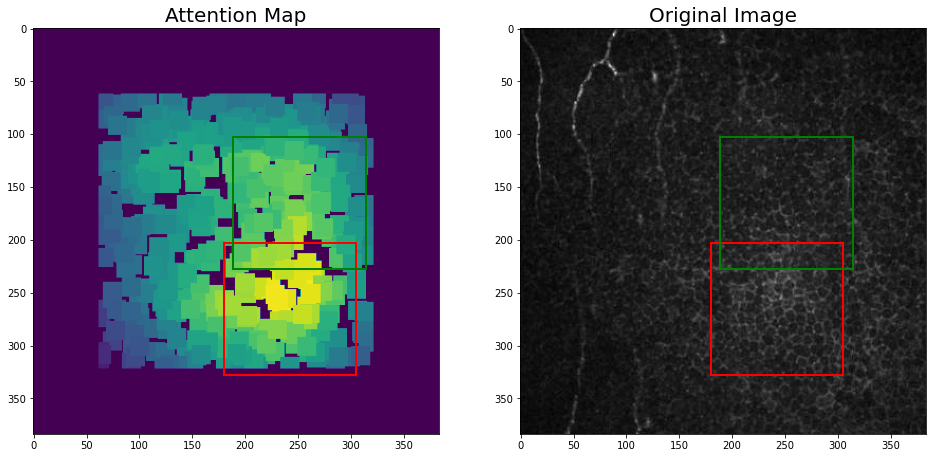

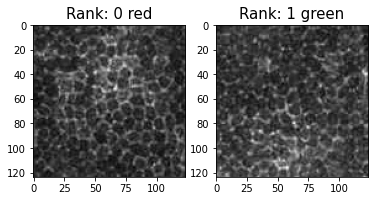

Calculating grey level features:  12%|█▏        | 61/500 [00:00<00:00, 605.16it/s]

65-od-1 Mild


Quick Convolution: 100%|██████████| 500/500 [00:00<00:00, 27290.68it/s]


Plotting output


<Figure size 432x288 with 0 Axes>

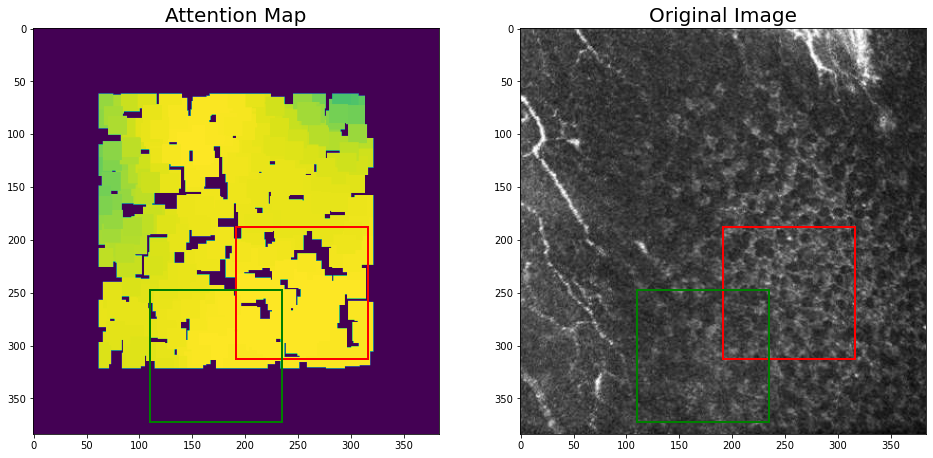

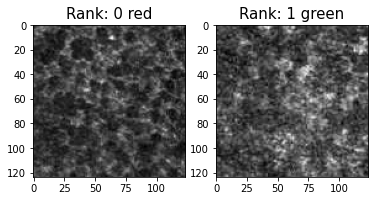

Calculating grey level features:  14%|█▍        | 72/500 [00:00<00:00, 718.01it/s]

74-os-2 Mild


Quick Convolution: 100%|██████████| 500/500 [00:00<00:00, 26541.86it/s]


Plotting output


<Figure size 432x288 with 0 Axes>

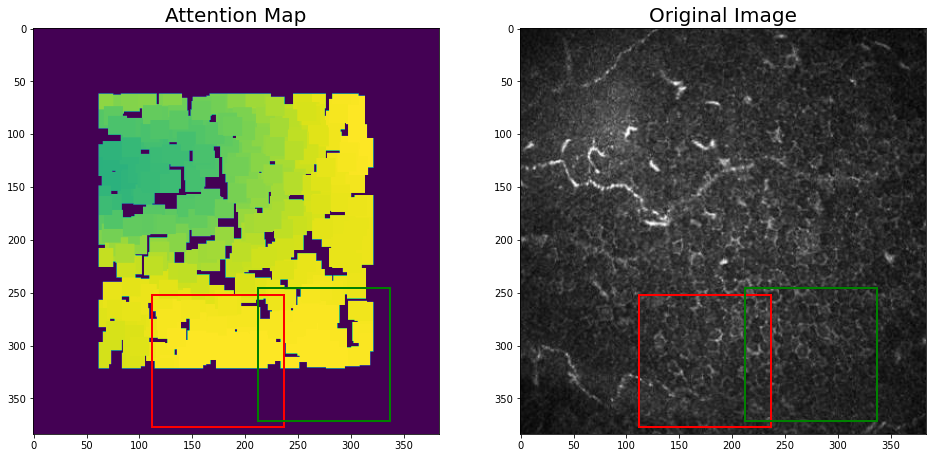

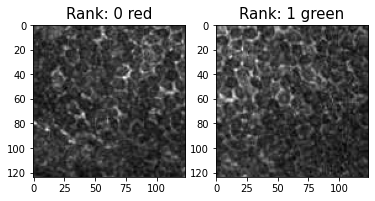

Calculating grey level features:  29%|██▊       | 143/500 [00:00<00:00, 698.90it/s]

50-os-53 Mild


Quick Convolution: 100%|██████████| 500/500 [00:00<00:00, 31528.06it/s]


Plotting output


<Figure size 432x288 with 0 Axes>

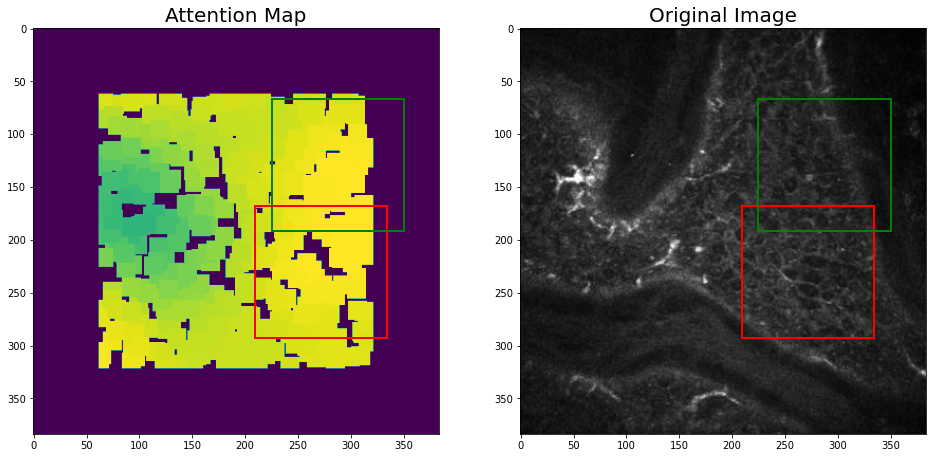

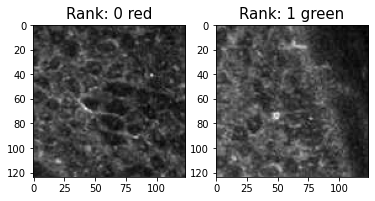

Calculating grey level features:  17%|█▋        | 85/500 [00:00<00:00, 849.87it/s]

50-od-9 Moderate


Quick Convolution: 100%|██████████| 500/500 [00:00<00:00, 28636.71it/s]


Plotting output


<Figure size 432x288 with 0 Axes>

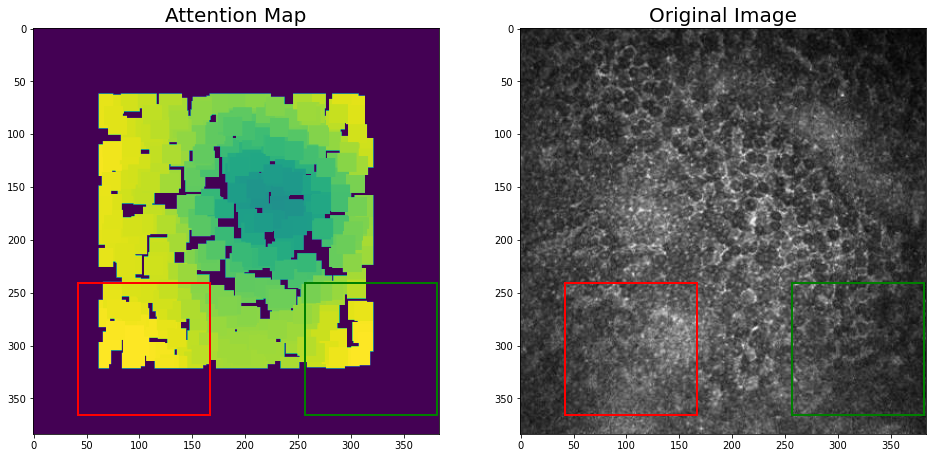

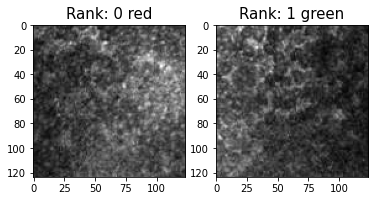

Calculating grey level features:  13%|█▎        | 66/500 [00:00<00:00, 657.41it/s]

76-od-7 Moderate


Quick Convolution: 100%|██████████| 500/500 [00:00<00:00, 33559.26it/s]


Plotting output


<Figure size 432x288 with 0 Axes>

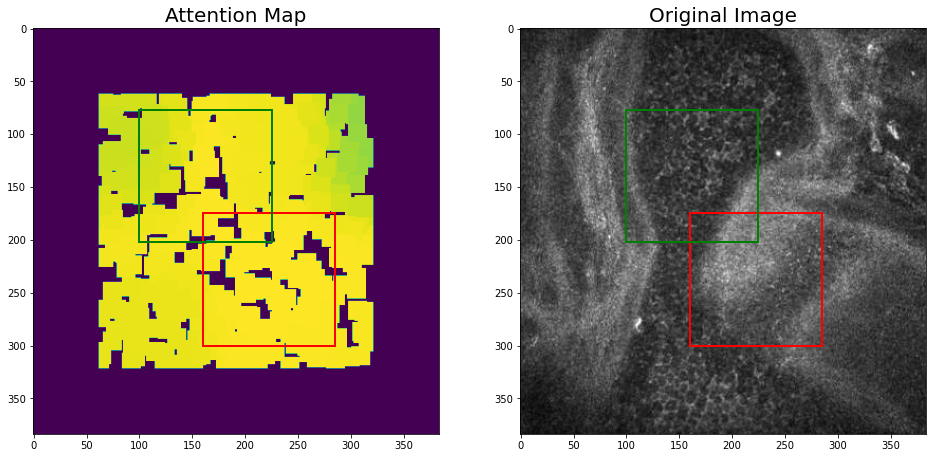

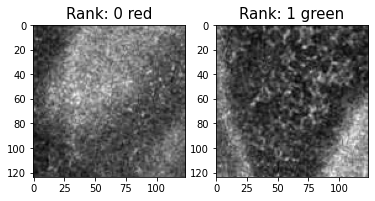

Calculating grey level features:  14%|█▍        | 71/500 [00:00<00:00, 704.39it/s]

4-od-18 Moderate


Quick Convolution: 100%|██████████| 500/500 [00:00<00:00, 26955.68it/s]


Plotting output


<Figure size 432x288 with 0 Axes>

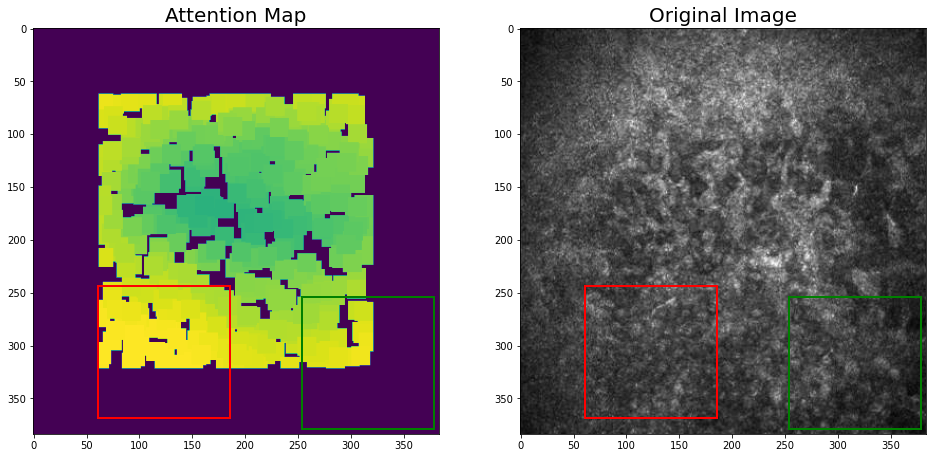

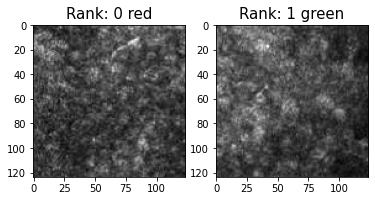

Calculating grey level features:  14%|█▍        | 71/500 [00:00<00:00, 706.36it/s]

4-os-1 Moderate


Quick Convolution: 100%|██████████| 500/500 [00:00<00:00, 28173.89it/s]


Plotting output


<Figure size 432x288 with 0 Axes>

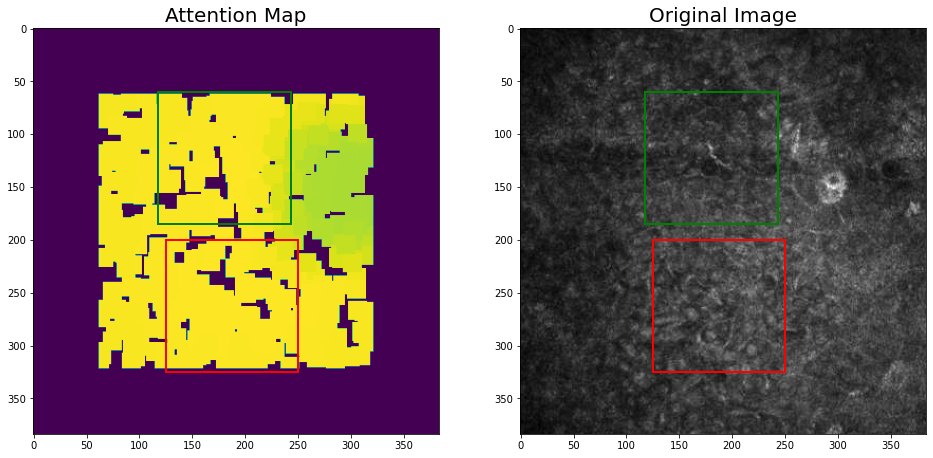

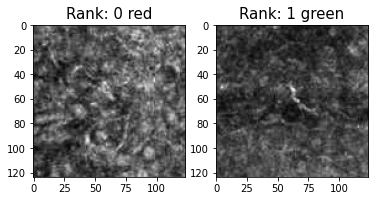

Calculating grey level features:  14%|█▍        | 70/500 [00:00<00:00, 695.50it/s]

14-od-6 Severe


Quick Convolution: 100%|██████████| 500/500 [00:00<00:00, 36384.88it/s]


Plotting output


<Figure size 432x288 with 0 Axes>

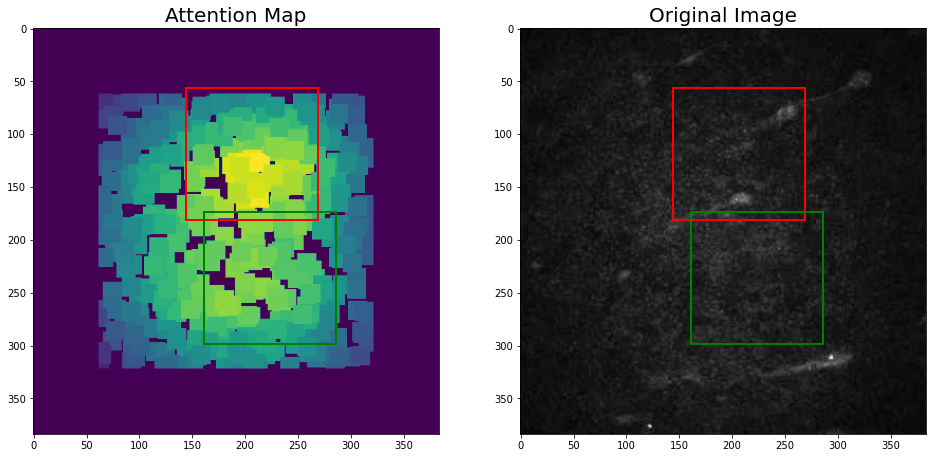

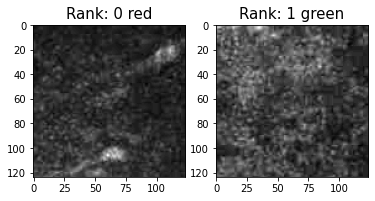

Calculating grey level features:  35%|███▍      | 173/500 [00:00<00:00, 852.06it/s]

39-od-12 Severe


Quick Convolution: 100%|██████████| 500/500 [00:00<00:00, 34676.28it/s]


Plotting output


<Figure size 432x288 with 0 Axes>

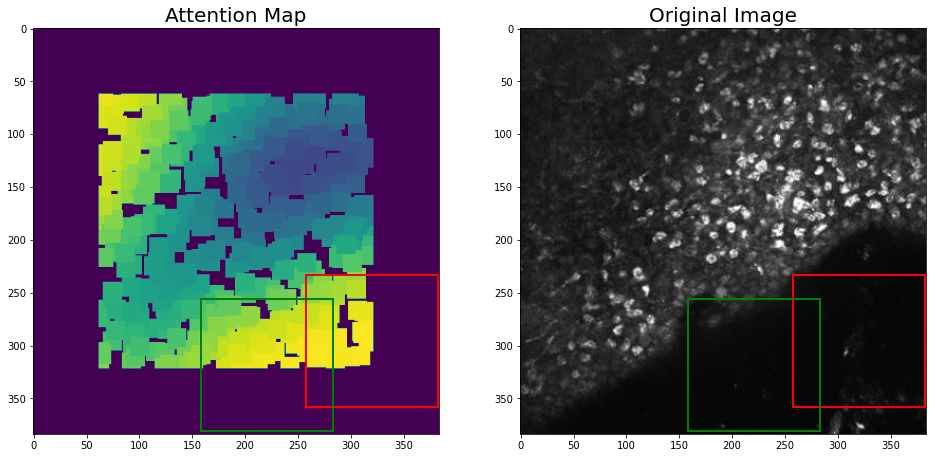

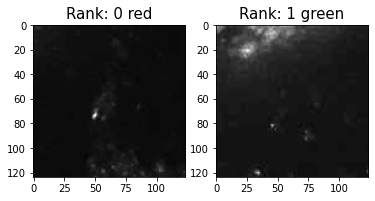

Calculating grey level features:  13%|█▎        | 63/500 [00:00<00:00, 623.14it/s]

87-od-2 Severe


Quick Convolution: 100%|██████████| 500/500 [00:00<00:00, 33317.74it/s]


Plotting output


<Figure size 432x288 with 0 Axes>

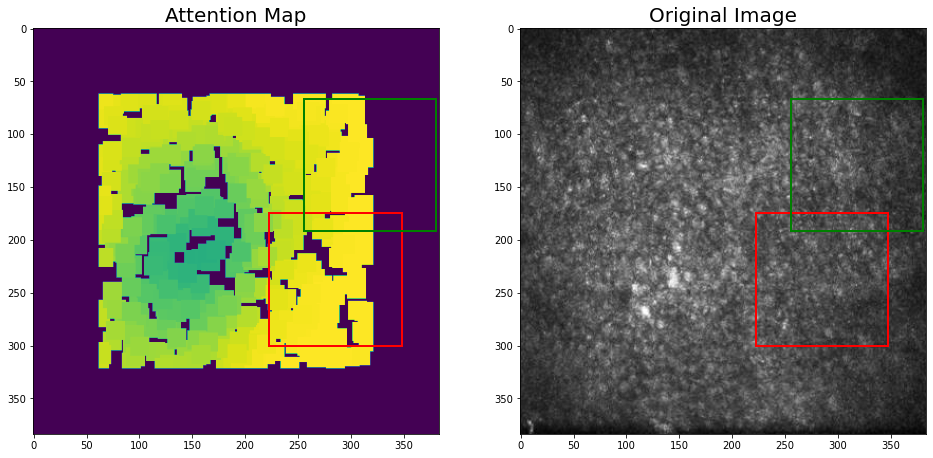

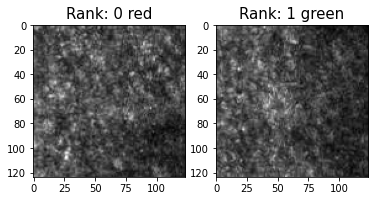

Calculating grey level features:  14%|█▍        | 71/500 [00:00<00:00, 702.25it/s]

87-os-38 Severe


Quick Convolution: 100%|██████████| 500/500 [00:00<00:00, 35640.39it/s]


Plotting output


<Figure size 432x288 with 0 Axes>

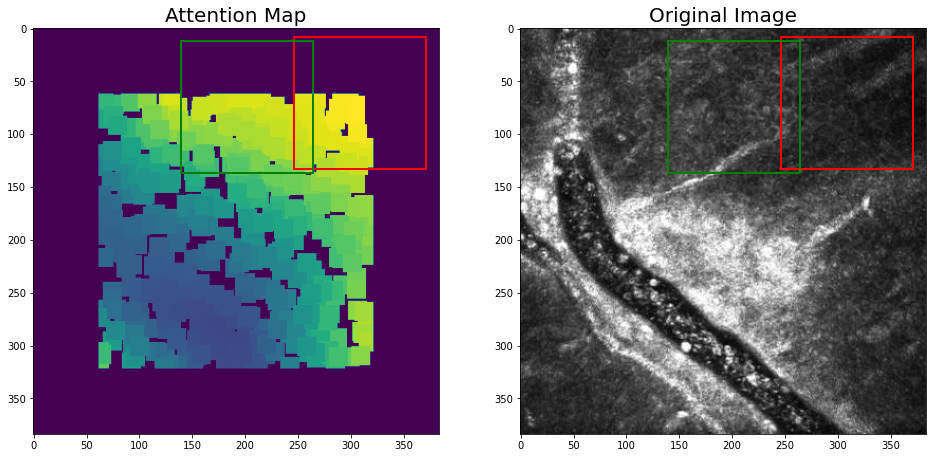

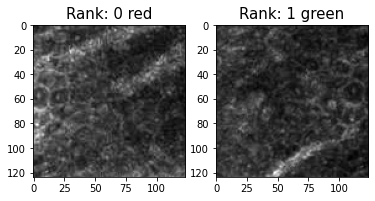

<Figure size 432x288 with 0 Axes>

In [83]:
importlib.reload(st)
importlib.reload(ld)
param_config_path = '../config/optimal_tile_params.json'
tile_select_params = ld.get_tile_select_params(param_config_path)['BEC']
tilesegmenter = st.TileSegmenter(
    **tile_select_params,
    plot_patches=True,
    show_tqdm=True
)

for i in range(metadata.shape[0]):
    example_sub = metadata.iloc[i]
    example_scan = example_sub[cc_scan]
    patient_sample = example_sub['study_number_id_eye']
    img_class = example_sub['clinical']
    pid, img_slice = ld.convert_id_to_folder_label(
        patient_sample,
        example_scan
    )
    img = ld.get_bcd_image(img_class, pid, img_slice, cv2.IMREAD_UNCHANGED, config_path=config_path)
    print(pid, img_class)
    
    patches = tilesegmenter.segment_tiles(img)
    plt.suptitle(img_class + pid)

# Evaluating performance using qualitative view of selected tiles

In [77]:
qualitative_data = pd.read_excel(
    '/Users/akre96/data/BE_224B/BEC_Tile_Evaluation.xlsx'
)
qualitative_data = qualitative_data[['id', 'cc scan','grade', 'positive', 'negative', 'scan_num']].dropna()
qualitative_data.describe()
qualitative_data['percent_true'] = 100*qualitative_data.positive/2
qualitative_data['has_1'] = qualitative_data.positive >= 1

# Training set is CC Scan 1
training_set = qualitative_data[qualitative_data.scan_num == 1]

# Evaluation set is CC Scan 2 and 3
eval_set = qualitative_data[qualitative_data.scan_num != 1]

In [48]:
eval_set.groupby('grade').percent_true.describe()

count   mean        std   min   25%   50%    75%    max
grade                                                            
Control     8.0  68.75  37.201190   0.0  50.0  75.0  100.0  100.0
Mild        6.0  75.00  27.386128  50.0  50.0  75.0  100.0  100.0
Moderate    8.0  50.00  37.796447   0.0  37.5  50.0   62.5  100.0
Severe      8.0  56.25  49.551560   0.0   0.0  75.0  100.0  100.0

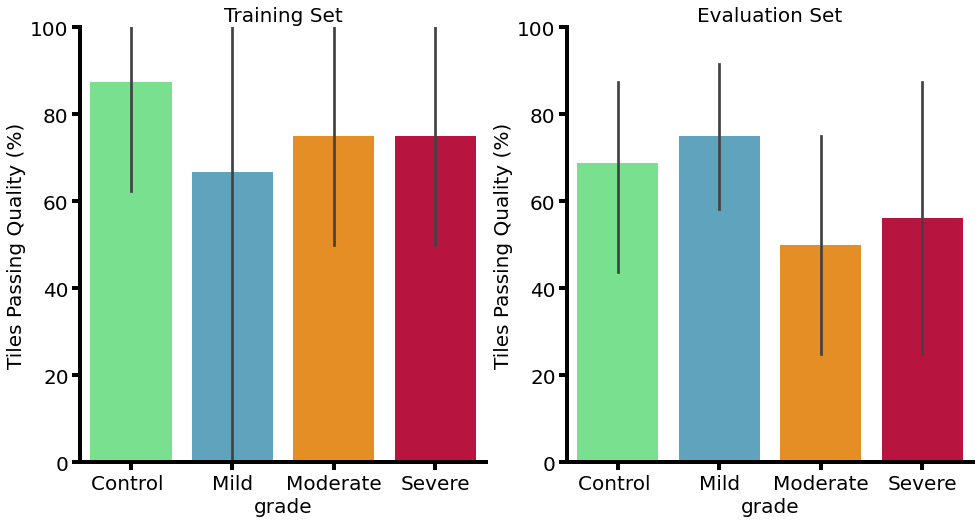

In [57]:
fig, axes = plt.subplots(ncols=2, figsize=(16,8))
palette=[
    '#78e08f',
    '#60a3bc',
    '#e58e26',
    '#b71540'
]

ax=axes[0]
sns.barplot(
    x='grade',
    y='percent_true',
    data=training_set,
    ax=ax,
    palette=palette,
    saturation=1,
)
ax.set_ylabel('Tiles Passing Quality (%)')
ax.set_ylim([0,100])
ax.set_title('Training Set', fontsize=20)
fmt.despine_thicken_axes(ax, fontsize=20)

ax=axes[1]
sns.barplot(
    x='grade',
    y='percent_true',
    data=eval_set,
    ax=ax,
    palette=palette,
    saturation=1,
)
ax.set_ylim([0,100])
ax.set_title('Evaluation Set', fontsize=20)
ax.set_ylabel('Tiles Passing Quality (%)')
fmt.despine_thicken_axes(ax, fontsize=20)

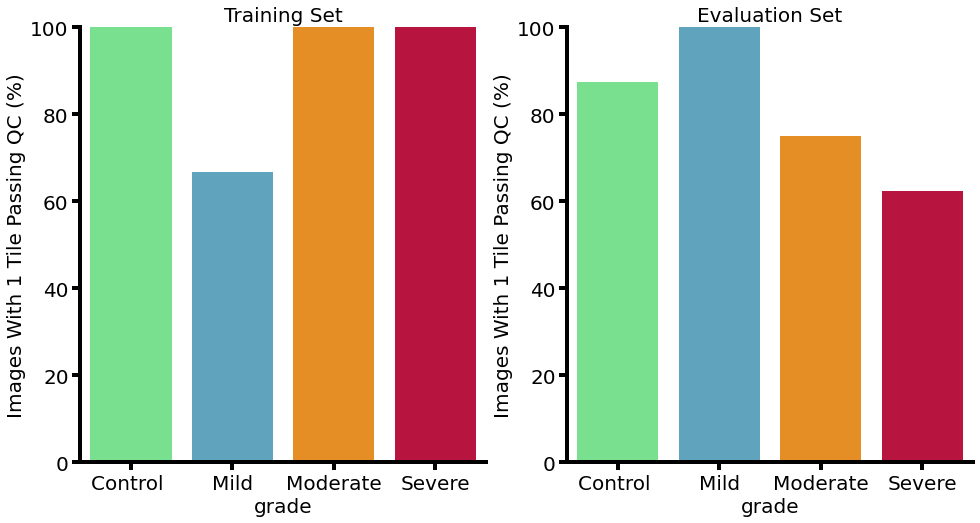

In [74]:
perc_1 = 100*training_set.groupby('grade').has_1.sum()/training_set.groupby('grade').id.count()
perc_1 = pd.DataFrame(perc_1).reset_index()
fig, axes = plt.subplots(ncols=2, figsize=(16,8))
ax=axes[0]
sns.barplot(
    x='grade',
    y=0,
    data=perc_1,
    ax=ax,
    palette=palette,
    saturation=1,
)
ax.set_ylabel('Images With 1 Tile Passing QC (%)')
ax.set_ylim([0,100])
ax.set_title('Training Set', fontsize=20)
fmt.despine_thicken_axes(ax, fontsize=20)

perc_1 = 100*eval_set.groupby('grade').has_1.sum()/eval_set.groupby('grade').id.count()
perc_1 = pd.DataFrame(perc_1).reset_index()
ax=axes[1]
sns.barplot(
    x='grade',
    y=0,
    data=perc_1,
    ax=ax,
    palette=palette,
    saturation=1,
)
ax.set_ylabel('Images With 1 Tile Passing QC (%)')
ax.set_ylim([0,100])
ax.set_title('Evaluation Set', fontsize=20)
fmt.despine_thicken_axes(ax, fontsize=20)